In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df= pd.read_csv("C:\\Users\\DELL\\Downloads\\archive (21)\\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [20]:
df.shape

(1143, 13)

<h7> Now lets check through count plot which quality is more prevalent <h7>

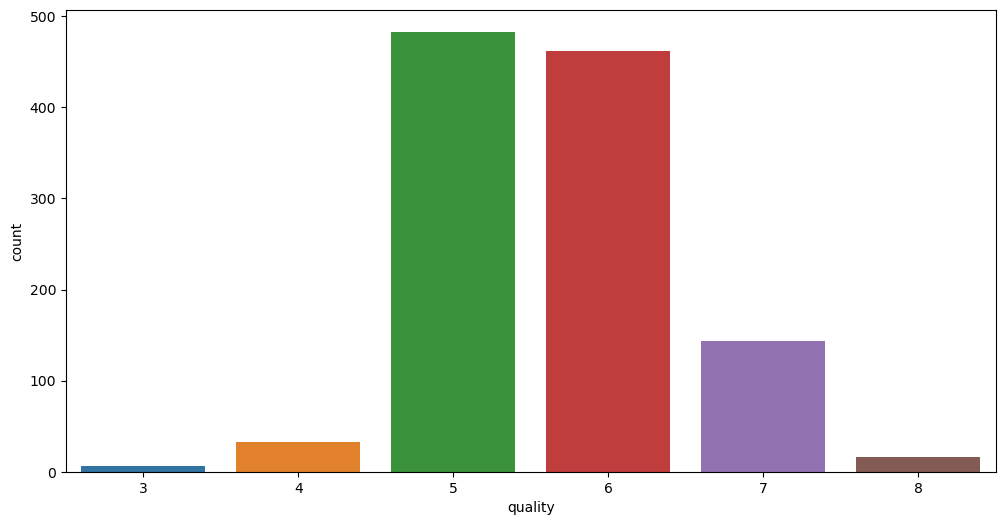

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='quality')
plt.show()

<h7> As we can see grade number 5 is in larger quantity <h7>

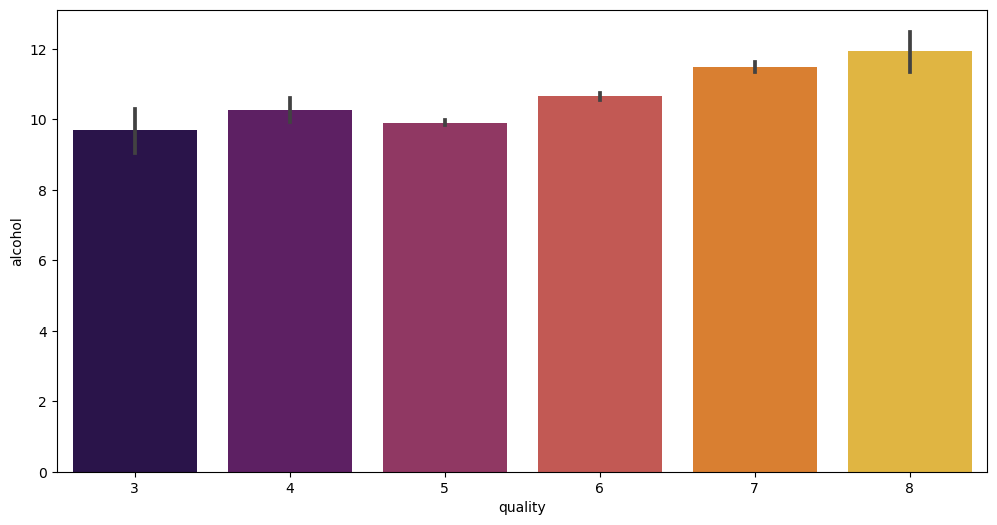

In [22]:
# lets compare alcohol and quality 
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='alcohol', data=df, palette='inferno')
plt.show()

<h7> As the alcohol content rises, so does the quality <h7>

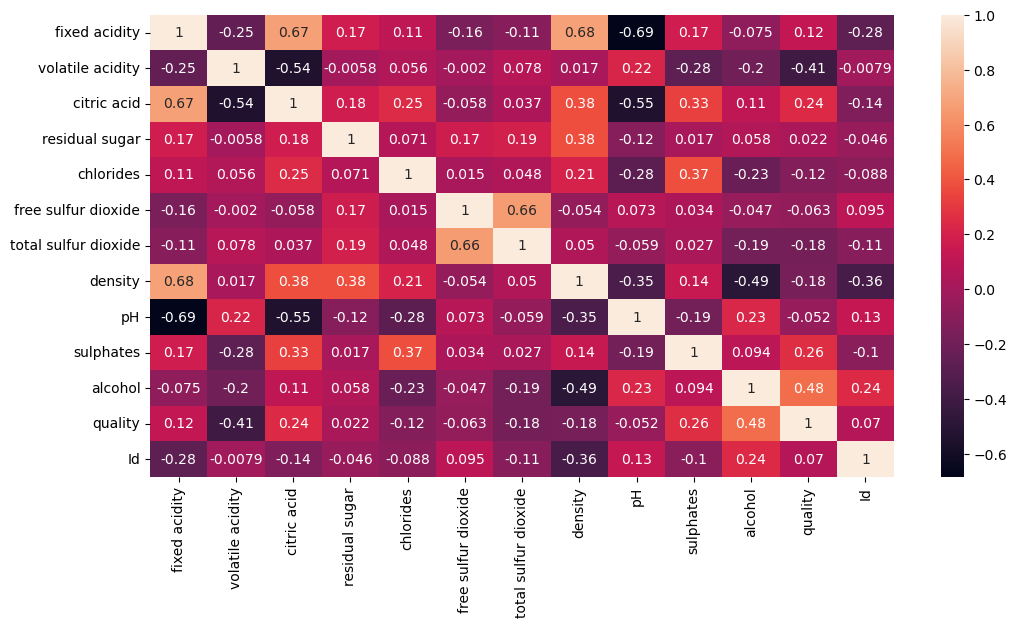

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

<h7> As we can see fixed acidity, citric acid, residual sugar, sulphates and alcohol are having positive relationship with quality<h7>

In [29]:
x = df.drop(['quality'], axis=1)
y = df['quality']

<h5> Data Preprocessing <h5>

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<h7> Scaling the values to fit them into model <h7>

In [73]:
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [74]:
from sklearn.metrics import accuracy_score

<h3> Random Forest Classifier <h3>

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)
rf.fit(x_train_std,y_train)
accuracy_score(y_test, rf.predict(x_test_std))

0.6681222707423581

<h3> Stochastic Gradient Descent <h3>

In [77]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train, y_train)
y_pred = sgd_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.009578158554114948


<h3> Support Vector Classifier <h3>

In [79]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC(kernel='rbf', random_state=42)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.845


<h7> So the highest accuracy among these three technqiue is of Stochastic Gradient Descent i.e 95% <h7>